In [ ]:
!pip install openpyxl

In [1]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [3]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n140,Carbon Portal


In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name,vocab_iri
0,DEIMS-SDR,EnvThes,http://vocabs.lter-europe.net/EnvThes/
1,ANAEE-France Metadata Catalog,ANAEETHES,http://agroportal.lirmm.fr/ontologies/ANAEETHES
2,EUDAT/FZJ B2SHARE,EnvThes,http://vocabs.lter-europe.net/EnvThes/
3,Carbon Portal,ICOS,http://meta.icos-cp.eu/ontologies/cpmeta/
4,Carbon Portal,PROV-O,http://www.w3.org/ns/prov
5,Carbon Portal,Darwin Core,http://purl.org/dc/elements/1.1/
6,eLTER CDN,EnvThes,http://vocabs.lter-europe.net/EnvThes/
7,LifeWatch Italy Portal,LW Endemisms,http://thesauri.lifewatchitaly.eu/
8,LifeWatch Italy Portal,LW MacroAlgae,http://thesauri.lifewatchitaly.eu/
9,LifeWatch Italy Portal,LW MacroZooBenthos Traits,http://thesauri.lifewatchitaly.eu/


In [5]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/hasAuthenticationMethod
1,http://envri.eu/ns/contentAccessAuthorizationRequired
2,http://envri.eu/ns/maintainsOwnUserDatabase
3,http://envri.eu/ns/usesAuthorisationTechnique


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
1,ICOS Carbon Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q54872,NaN
2,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/DEIMS-SDR,NaN
3,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
4,eLTER DEIMS-SDR vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.w3.org/2004/02/skos/,NaN
...,...,...,...,...
66,ICOS Carbon Portal metadata,http://envri.eu/ns/supportedExportFormats,n170,https://www.wikidata.org/entity/Q8811
67,eLTER DEIMS-SDR metadata,http://envri.eu/ns/supportedExportFormats,n80,https://www.wikidata.org/entity/Q2115
68,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/supportedExportFormats,n21,https://www.wikidata.org/entity/Q54872
69,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/supportedExportFormats,n21,https://www.wikidata.org/entity/Q2115


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,DEIMS-SDR,http://envri.eu/ns/EML2.0
1,DEIMS-SDR,https://www.wikidata.org/entity/Q30079268
2,DEIMS-SDR,https://www.wikidata.org/entity/Q7451082
3,DEIMS-SDR,http://envri.eu/ns/INSPIRE_EF
4,DEIMS-SDR,https://www.wikidata.org/entity/Q50377276
5,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q50377276
6,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q30079268
7,Carbon Portal,http://envri.eu/ns/GeoDCAT
8,Carbon Portal,https://www.wikidata.org/entity/Q50377276
9,LifeWatch Italy Portal,https://www.wikidata.org/entity/Q30079268


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
1,ICOS Carbon Portal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q54872,NaN
2,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/DEIMS-SDR,NaN
3,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
4,eLTER DEIMS-SDR vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.w3.org/2004/02/skos/,NaN
...,...,...,...,...
66,ICOS Carbon Portal metadata,http://envri.eu/ns/supportedExportFormats,n170,https://www.wikidata.org/entity/Q8811
67,eLTER DEIMS-SDR metadata,http://envri.eu/ns/supportedExportFormats,n80,https://www.wikidata.org/entity/Q2115
68,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/supportedExportFormats,n21,https://www.wikidata.org/entity/Q54872
69,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/supportedExportFormats,n21,https://www.wikidata.org/entity/Q2115


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,ICOS Carbon Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n161,http://envri.eu/ns/JupiterNotebooks
1,LifeWatch LifeWatch Italy Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n113,https://www.wikidata.org/entity/Q2055062
2,eLTER DEIMS-SDR data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
3,ANAEE-France ANAEE-France Metadata Catalog data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
4,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
5,ICOS repository,http://envri.eu/ns/hasPersistencyGuaranty,20 years,NaN
6,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
7,LifeWatch repository,http://envri.eu/ns/hasPersistencyGuaranty,25 years,NaN
8,ANAEE-France repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
9,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN


In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [11]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
1,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
2,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/AccessWithoutCosts,access without costs,NaN
3,ICOS Carbon Portal access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
4,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
5,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.wikidata.org/entity/Q513000,NaN
6,ICOS Carbon Portal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://doi.org/10.17487%2FRFC2616,NaN
7,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,http://www.lifewatchitaly.eu/home?p_p_id=58&p_p_lifecycle=0&p_p_state=maximized&p_p_mode=view&saveLastPath=false&_58_struts_action=%2Flogin%2Flogin,NaN
8,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q188816,NaN
9,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN


In [12]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/hasAuthenticationMethod,none-open,NaN
1,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/hasAuthenticationMethod,password,NaN
2,ICOS Carbon Portal access mechanism,http://envri.eu/ns/hasAuthenticationMethod,OAuth paired with eduGain,NaN
3,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/hasAuthenticationMethod,Liferay,NaN
4,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
5,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
6,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
7,ICOS Carbon Portal access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
8,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,true,NaN
9,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
1,ICOS Carbon Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
2,eLTER DEIMS-SDR metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN
3,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
4,eLTER DEIMS-SDR vocabularies,http://envri.eu/ns/hasVocabularyIri,http://vocabs.lter-europe.net/EnvThes/,NaN
5,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://purl.org/dc/elements/1.1/,NaN
6,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/PhytoTraits/,NaN
7,ANAEE-France ANAEE-France Metadata Catalog vocabularies,http://envri.eu/ns/hasVocabularyIri,http://agroportal.lirmm.fr/ontologies/ANAEETHES,NaN
8,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://meta.icos-cp.eu/ontologies/cpmeta/,NaN
9,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/,NaN


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [15]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,eLTER repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
1,ICOS repository,http://envri.eu/ns/hasPolicies,n172,http://envri.eu/ns/Usage
2,LifeWatch repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/planned,NaN
3,ANAEE-France repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
4,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/usesDataLicenses,https://www.wikidata.org/entity/Q513000,NaN
5,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/usesDataLicenses,n65,http://www.wikidata.org/entity/Q34179348
6,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/usesDataLicenses,https://www.wikidata.org/entity/Q513000,NaN
7,ICOS Carbon Portal access mechanism,http://envri.eu/ns/usesDataLicenses,n150,http://www.wikidata.org/entity/Q20007257
8,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/usesDataLicenses,n100,http://www.wikidata.org/entity/Q20007257
9,ICOS Carbon Portal access mechanism,http://envri.eu/ns/dataLicenseIri,https://creativecommons.org/licenses/by/4.0/,NaN


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
2,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN
3,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN


In [18]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,LifeWatch Italy Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,http://envri.eu/ns/planned,NaN
1,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
2,Carbon Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,ANAEE-France ANAEE-France Metadata Catalog identifier,http://envri.eu/ns/isAssigned,automatically,NaN
1,eLTER DEIMS-SDR identifier,http://envri.eu/ns/isAssigned,automatically,NaN
2,eLTER EUDAT/FZJ B2SHARE identifier,http://envri.eu/ns/isAssigned,automatically,NaN
3,LifeWatch LifeWatch Italy Portal identifier,http://envri.eu/ns/isAssigned,automatically,NaN
4,ICOS Carbon Portal identifier,http://envri.eu/ns/isAssigned,automatically,NaN
5,ICOS Carbon Portal identifier,http://envri.eu/ns/isAssigned,manually,NaN
6,eLTER DEIMS-SDR identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q6664565,NaN
7,eLTER EUDAT/FZJ B2SHARE identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q1575058,NaN
8,ICOS Carbon Portal identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q1575058,NaN
9,ICOS Carbon Portal identifier,http://envri.eu/ns/usesIdentifierSystem,https://www.wikidata.org/entity/Q25670,NaN


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n121,http://envri.eu/ns/TextOnly
1,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n123,http://envri.eu/ns/TextOnly
2,ANAEE-France ANAEE-France Metadata Catalog metadata schema,http://envri.eu/ns/includesProvenanceFields,n20,http://envri.eu/ns/TextOnly
3,ICOS Carbon Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n167,http://envri.eu/ns/TextOnly
4,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n79,http://envri.eu/ns/TextOnly
5,ICOS Carbon Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n169,http://envri.eu/ns/SimplifiedProvO
6,ANAEE-France ANAEE-France Metadata Catalog metadata schema,http://envri.eu/ns/includesProvenanceFields,n18,http://envri.eu/ns/TextOnly
7,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n77,http://envri.eu/ns/TextOnly
8,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n75,http://envri.eu/ns/TextOnly
9,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n125,http://envri.eu/ns/TextOnly


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,http://envri.eu/ns/planned,NaN
1,ICOS Carbon Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
2,eLTER DEIMS-SDR metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,partially,NaN
3,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
4,eLTER repository,http://envri.eu/ns/hasMetadata,https://www.wikidata.org/entity/Q513000,NaN
5,ICOS repository,http://envri.eu/ns/hasMetadata,n164,NaN
6,eLTER repository,http://envri.eu/ns/hasMetadata,https://www.wikidata.org/entity/Q513000,NaN
7,LifeWatch repository,http://envri.eu/ns/hasMetadata,n116,NaN
8,ANAEE-France repository,http://envri.eu/ns/hasMetadata,n15,NaN
9,eLTER repository,http://envri.eu/ns/hasMetadata,n70,NaN


In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,eLTER repository,http://envri.eu/ns/inRegistries,n41,http://envri.eu/ns/re3data
1,ICOS repository,http://envri.eu/ns/inRegistries,n176,http://envri.eu/ns/re3data
2,LifeWatch repository,http://envri.eu/ns/inRegistries,http://envri.eu/ns/planned,NaN
3,ANAEE-France repository,http://envri.eu/ns/inRegistries,http://envri.eu/ns/planned,NaN
4,eLTER repository,http://envri.eu/ns/inRegistries,n83,http://envri.eu/ns/re3data
5,ICOS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.icos-cp.eu/portal,NaN
6,LifeWatch repository,http://envri.eu/ns/hasRepositoryUrl,http://www.lifewatchitaly.eu/catalogue-of-resources,NaN
7,ANAEE-France repository,http://envri.eu/ns/hasRepositoryUrl,http://w3.avignon.inra.fr/geonetwork_anaee,NaN
8,eLTER repository,http://envri.eu/ns/hasRepositoryUrl,https://deims.org/,NaN
9,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasLocalSearchEngineUrl,http://www.servicecentrelifewatch.eu/web/lifewatch-italia/catalogue-of-resources,NaN


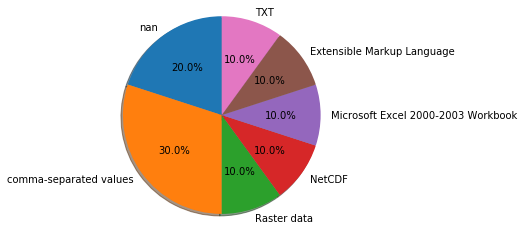

In [26]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
}
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

labels = list(c.keys())
sizes = list(c.values())
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()